# Project : Restaurant Recommendation System




Objective: To develop a restaurant recommendation system that suggests top 5 restaurants based on user preferences and significant features

Data Source: UCI Machine Learning Repository

Data Source Link: https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data

Data Description: There are 9 reports provided for this project. Of these 9 reports, 5 reports contain restaurant data, 4 reports contain user data and 1 report contains the rating data.

Approach:

**1) Exploratory data analysis: **
Here we are computing descriptive statistics of each report and started identifying features and target variable

**2) Data cleaning: **
a) NaN Handling: The are many columns with missing values or '?'. We are replacing some of the missing features by average of the column or median. For categorical values, we are making few assumptions. For example, if parking column says '?' we are assuming it as 'No Parking' as more than 80% of all the parking column values are 'No Parking'.
b) Univariate Analysis: Here we are plotting histograms to look for outliers and unusual spikes in the variance

**3) Data Integration: **
a) Here we are merging all 5 reports containing restaurant data into one dataframe, 4 reports containing customer data into one dataframe.
b) Many features have values split into multiple rows. For example, the restaurant hours data has hours listed for each day into multiple rows. For these kind of scenarios, we are creating functions to collate all the related data for a given restaurant into 1 or 2 rows
 

**4) Data reduction: **
a) For this project, restaurant rating is most important variable. If the restaurants do not have rating data, we are not considering those restaurants. 
b) Some user features like height, weight, color are irrelevant to our analysis So we are performing data reduction to reduce these data points.

**5) Data Transformation: **
a) One-hot encoding: Restaurant cuisine values are categorical. So we are performing one-hot encoding to convert them to numbers
b) Aggregation: We are performing row-wise summations for features that are more useful when they are aggregated.
c) We are normailizing the data to address any issue of model being highly sensitive to scaling

**6) Feature Engineering: **
a) Coorelation between target and features: We developed methods to plot trends between 1) features and ratings 2) features and rating within various user profiles
b) ANOVA: We would like to find the significant features based on the ANOVA generated

**7) Model Selection and Evaluation: **
As the data is labeled data, we are using a supervised learning model. As the target variable is continous wer are using regressors

Linear Regression: We would like to do Linear Regression as a benchmark and quickly calculate coefficients and understand significance.
K-Nearest Neighbors: We would like to use kNN regressor as in kNN nearer neighbors contribute more to the average than the more distant ones. Given that we are trying to find the restaurants that closely match to the user preferred restaurants with similarity in features, we believe kNN is a good model.
We will evaluate the model by calculating RMSE scores by applying k-fold cross-validation.

**8) Restaurant Recommendation: **
Using the selected model, we will predict ratings for the restaurants that the user have not rated yet. Then we will recommend the top 5 restaurants based on the overall restaurant dataset



## Step 1: Exploratory data analysis begins!


In [1]:
import pandas as pd
import numpy as np

res_payment = pd.read_csv('chefmozaccepts.csv', encoding='utf-8')
res_cuisine = pd.read_csv('chefmozcuisine.csv', encoding='utf-8')
res_hours = pd.read_csv('chefmozhours4.csv', encoding='utf-8')
res_parking = pd.read_csv('chefmozparking.csv', encoding='utf-8')
user_cuisine = pd.read_csv('usercuisine.csv', encoding='utf-8')
user_payment = pd.read_csv('userpayment.csv', encoding='utf-8')
user_profile = pd.read_csv('userprofile.csv', encoding='utf-8')
final_rating = pd.read_csv('rating_final.csv', encoding='utf-8')
res_geo = pd.read_csv('geoplaces2.csv', encoding='ISO-8859-1')

In [2]:
data_describe = {}
data_describe['Total number of rows in res_payment'] = res_payment.shape[0]
data_describe['Number of unique restaurants in res_payment'] = res_payment['placeID'].nunique()
data_describe['Total number of rows in res_cuisine'] = res_cuisine.shape[0]
data_describe['Number of unique restaurants in res_cuisine'] = res_cuisine['placeID'].nunique()
data_describe['Total number of rows in res_hours'] = res_hours.shape[0]
data_describe['Number of unique restaurants in res_hours'] = res_hours['placeID'].nunique()
data_describe['Total number of rows in res_parking'] = res_parking.shape[0]
data_describe['Number of unique restaurants in res_parking'] = res_parking['placeID'].nunique()
data_describe['Total number of rows in res_geo'] = res_geo.shape[0]
data_describe['Number of unique restaurants in res_geo'] = res_geo['placeID'].nunique()

data_describe['Total number of rows in user_cuisine'] = user_cuisine.shape[0]
data_describe['Number of unique users in user_cuisine'] = user_cuisine['userID'].nunique()
data_describe['Total number of rows in user_payment'] = user_payment.shape[0]
data_describe['Number of unique users in user_payment'] = user_payment['userID'].nunique()
data_describe['Total number of rows in user_profile'] = user_profile.shape[0]
data_describe['Number of unique users in user_profile'] = user_profile['userID'].nunique()

data_describe['Total number of rows in final_rating'] = final_rating.shape[0]
data_describe['Number of unique restaurants in final_rating'] = final_rating['placeID'].nunique()
data_describe['Number of unique users in final_rating'] = final_rating['userID'].nunique()

data_describe = {
                    'Metric': [
                            'Total number of rows in res_payment',
                            'Number of unique restaurants in res_payment',
                            'Total number of rows in res_cuisine',
                            'Number of unique restaurants in res_cuisine',
                            'Total number of rows in res_hours',
                            'Number of unique restaurants in res_hours',
                            'Total number of rows in res_parking',
                            'Number of unique restaurants in res_parking',
                            'Total number of rows in res_geo',
                            'Number of unique restaurants in res_geo',

                            'Total number of rows in user_cuisine',
                            'Number of unique users in user_cuisine',
                            'Total number of rows in user_payment',
                            'Number of unique users in user_payment',
                            'Total number of rows in user_profile',
                            'Number of unique users in user_profile',

                            'Total number of rows in final_rating',
                            'Number of unique restaurants in final_rating',
                            'Number of unique users in final_rating'
                            ],
                    'Value': [
                            res_payment.shape[0],
                            res_payment['placeID'].nunique(),
                            res_cuisine.shape[0],
                            res_cuisine['placeID'].nunique(),
                            res_hours.shape[0],
                            res_hours['placeID'].nunique(),
                            res_parking.shape[0],
                            res_parking['placeID'].nunique(),
                            res_geo.shape[0],
                            res_geo['placeID'].nunique(),

                            user_cuisine.shape[0],
                            user_cuisine['userID'].nunique(),
                            user_payment.shape[0],
                            user_payment['userID'].nunique(),
                            user_profile.shape[0],
                            user_profile['userID'].nunique(),

                            final_rating.shape[0],
                            final_rating['placeID'].nunique(),
                            final_rating['userID'].nunique(),
                            ]

                }

data_describe_df = pd.DataFrame.from_dict(data_describe)
data_describe_df

,Metric,Value
0,Total number of rows in res_payment,1314
1,Number of unique restaurants in res_payment,615
2,Total number of rows in res_cuisine,916
3,Number of unique restaurants in res_cuisine,769
4,Total number of rows in res_hours,2339
5,Number of unique restaurants in res_hours,694
6,Total number of rows in res_parking,702
7,Number of unique restaurants in res_parking,675
8,Total number of rows in res_geo,130
9,Number of unique restaurants in res_geo,130


In [3]:
res_geo.head(3)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincï¿½n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none


<span style="color:blue">
res_geo dataframe contains columns like price, alcohol, dress_code, ambience and others. These are some important features.
    </span>

In [4]:
final_rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


<span style="color:blue">
The final rating has the target variable - **rating**. This is given by a user with a unique userID on a restaurant with unique placeID
    </span>

## Step 1: Exploratory Data Analysis completed. 


## Step 2: Data Cleaning starts!

<span style="color:blue">
 a) Data quality check: **NaN Handling **
 </span>
 
 <span style="color:blue">
  Checking how many null values are in these dataframes
</span>

In [5]:
print(res_payment.isnull().sum().sum())
print(res_cuisine.isnull().sum().sum())
print(res_hours.isnull().sum().sum())
print(res_parking.isnull().sum().sum())
print(user_cuisine.isnull().sum().sum())
print(user_payment.isnull().sum().sum())
print(user_profile.isnull().sum().sum())
print(final_rating.isnull().sum().sum())
print(res_geo.isnull().sum().sum())

0
0
0
0
0
0
0
0
0


<span style="color:blue">
There are no null values in all these dataframes.
</span>    


<span style="color:blue">
** b) Data quality check: Invalid characters **
</span>

<span style="color:blue">
Checking if any dataframes have value '?'
</span>

In [6]:
print(res_payment.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(res_cuisine.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(res_hours.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(res_parking.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(user_cuisine.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(user_payment.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(final_rating.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(user_profile.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))
print(res_geo.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any()))


Rpayment    False
dtype: bool
Rcuisine    False
dtype: bool
hours    False
days     False
dtype: bool
parking_lot    False
dtype: bool
userID      False
Rcuisine    False
dtype: bool
userID      False
Upayment    False
dtype: bool
userID    False
dtype: bool
userID              False
smoker               True
drink_level         False
dress_preference     True
ambience             True
transport            True
marital_status       True
hijos                True
interest            False
personality         False
religion            False
activity             True
color               False
budget               True
dtype: bool
the_geom_meter    False
name              False
address            True
city               True
state              True
country            True
fax                True
zip                True
alcohol           False
smoking_area      False
dress_code        False
accessibility     False
price             False
url                True
Rambience         False
franc

<span style="color:blue">
We could see from the above results that the dataframes - **user_profile and res_geo** contain '?' values.
</span>

<span style="color:blue">
Initially, we are starting '?' handling for user_profile below.
</span>

In [7]:
test1 = user_profile.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any())
print(user_profile.select_dtypes([np.object]).columns[test1])

Index(['smoker', 'dress_preference', 'ambience', 'transport', 'marital_status',
       'hijos', 'activity', 'budget'],
      dtype='object')


<span style="color:blue">
We can see that the above 8 columns have invalid value '?'
</span>    
<span style="color:blue">    
We would like to see the distribution and make assumptions to replace these '?' values.
</span>    

In [8]:
print('Feature: smoker')
print(user_profile['smoker'].value_counts())
print('\n')
print('Feature: dress_preference')
print(user_profile['dress_preference'].value_counts())
print('\n')
print('Feature: ambience')
print(user_profile['ambience'].value_counts())
print('\n')
print('Feature: transport')
print(user_profile['transport'].value_counts())
print('\n')
print('Feature: hijos')
print(user_profile['hijos'].value_counts())
print('\n')
print('Feature: activity')
print(user_profile['activity'].value_counts())
print('\n')
print('Feature: marital_status')
print(user_profile['marital_status'].value_counts())
print('\n')
print('Feature: budget')
print(user_profile['budget'].value_counts())

Feature: smoker
false    109
true      26
?          3
Name: smoker, dtype: int64


Feature: dress_preference
no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64


Feature: ambience
family      70
friends     46
solitary    16
?            6
Name: ambience, dtype: int64


Feature: transport
public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64


Feature: hijos
independent    113
?               11
kids            11
dependent        3
Name: hijos, dtype: int64


Feature: activity
student          113
professional      15
?                  7
unemployed         2
working-class      1
Name: activity, dtype: int64


Feature: marital_status
single     122
married     10
?            4
widow        2
Name: marital_status, dtype: int64


Feature: budget
medium    91
low       35
?          7
high       5
Name: budget, dtype: int64


In [9]:
#As 80% of the users are non-smokers, we are assuming the three users with unknown information to be non-smokers.
user_profile['smoker'] = user_profile['smoker'].replace('?','false')

'''
Dress preference feature has a potential to be an important factor.
When we checked the restaurant data, the restaurants have dress codes as 'casual', 'informal' and 'formal'.
Therefore, 1)to not disturb current distribution between 'formal' and 'informal' in the user's dress preference data,
2) as 'no preference' has the highest number of values,
we are replacing '?' with 'no preference' :
'''
user_profile['dress_preference'] = user_profile['dress_preference'].replace('?','no preference')

'''
Ambience feature has a potential to be an important factor.
When we checked the restaurant data, the restaurants have ambience values as 'familiar', 'quiet'.
As 'family' has the highest number of values, we are replacing '?' with 'family' :
'''
user_profile['ambience'] = user_profile['ambience'].replace('?','family')

# As the majority of the users are using public transport, we would like to replace the '?' value with 'public'
user_profile['transport'] = user_profile['transport'].replace('?','public')

# As close to 90% of the users are single, we would like to replace the '?' value with 'single'
user_profile['marital_status'] = user_profile['marital_status'].replace('?','single')

'''
Hijos mean children. Here, there is a clear distribution between marital status and hijos. 
there are 122 single people and 113 users who are independent. 
Therefore we assume hijos with '?' could refer to 'independent'
'''
user_profile['hijos'] = user_profile['hijos'].replace('?','independent')

''' As more than 85% of the users are single, students and with no children, 
we would like to replace the '?' value with 'student'
'''
user_profile['activity'] = user_profile['activity'].replace('?','student')

'''
As majority of users are with medium budget and more than 85% of the users are single, students and with no children, 
we would like to replace the '?' value with 'medium'
'''
user_profile['budget'] = user_profile['budget'].replace('?','medium')

In [10]:
print('Feature: smoker')
print(user_profile['smoker'].value_counts())
print('\n')
print('Feature: dress_preference')
print(user_profile['dress_preference'].value_counts())
print('\n')
print('Feature: ambience')
print(user_profile['ambience'].value_counts())
print('\n')
print('Feature: transport')
print(user_profile['transport'].value_counts())
print('\n')
print('Feature: hijos')
print(user_profile['hijos'].value_counts())
print('\n')
print('Feature: activity')
print(user_profile['activity'].value_counts())
print('\n')
print('Feature: marital_status')
print(user_profile['marital_status'].value_counts())
print('\n')
print('Feature: budget')
print(user_profile['budget'].value_counts())

Feature: smoker
false    112
true      26
Name: smoker, dtype: int64


Feature: dress_preference
no preference    58
formal           41
informal         35
elegant           4
Name: dress_preference, dtype: int64


Feature: ambience
family      76
friends     46
solitary    16
Name: ambience, dtype: int64


Feature: transport
public       89
car owner    35
on foot      14
Name: transport, dtype: int64


Feature: hijos
independent    124
kids            11
dependent        3
Name: hijos, dtype: int64


Feature: activity
student          120
professional      15
unemployed         2
working-class      1
Name: activity, dtype: int64


Feature: marital_status
single     126
married     10
widow        2
Name: marital_status, dtype: int64


Feature: budget
medium    98
low       35
high       5
Name: budget, dtype: int64


<span style="color:blue">
'?' handling for user_profile dataframe is completed now.
</span>    
<span style="color:blue">
    **Also we can see that:**
    Students are the major customer group. They are single and do not have children. Most of the customers are non-smokers, use public transport and prefer family or friendly ambience. And most of them pay cash with budget low or medium.
We are performing now for res_geo dataframe below:
</span>    

In [11]:
test2 = res_geo.select_dtypes([np.object]).apply(lambda x: x.str.contains('\?').any())
print(res_geo.select_dtypes([np.object]).columns[test2])

Index(['address', 'city', 'state', 'country', 'fax', 'zip', 'url'], dtype='object')


In [12]:
res_geo['country'].value_counts()

Mexico    89
?         28
mexico    13
Name: country, dtype: int64

<span style="color:blue">
As we know the data is that of Mexico, we can replace the '?' value in the country to 'Mexico'.
</span>

In [13]:
res_geo['country'] = res_geo['country'].replace('?','Mexico')
res_geo['country'] = res_geo['country'].replace('mexico','Mexico')
res_geo['country'].value_counts()

Mexico    130
Name: country, dtype: int64

<span style="color:blue">
For all other address values, it is difficult to assign an address as clearly the users are distinct.
So we would like to leave the '?' values as is for now.
</span>

<span style="color:blue">
**c) Data quality check: Univariate Analysis**
</span>

<span style="color:blue">
We are plotting histograms and looking for unusual spikes
    </span>

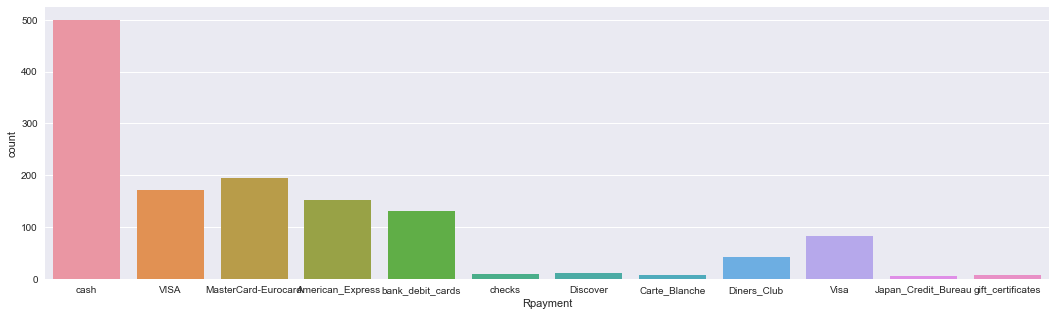

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18,5))
sns.set(style='darkgrid')
ax = sns.countplot(data = res_payment, x='Rpayment')
plt.show()

<span style="color:blue">
    The plot shows that cash is most preferred payment. We assume that Mexico is cash-driven economy. So we are not considering it unusual and leaving it as-is.
    </span>

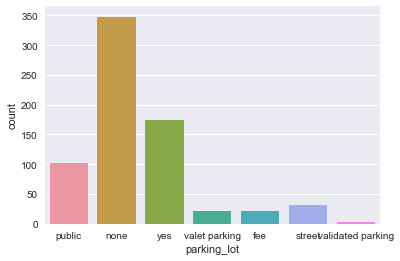

In [15]:
ax1 = sns.countplot(data = res_parking, x='parking_lot')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants do not have parking. We assume parking is an important feature. We would like to see the user preferences and then decide again whether parking plays an important role.
</span>    

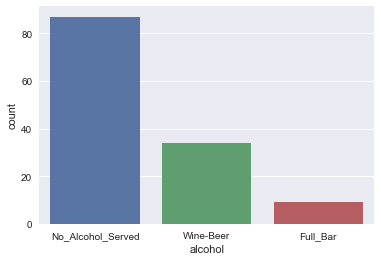

In [16]:
ax = sns.countplot(data = res_geo, x='alcohol')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants do not serve alcohol.
</span> 

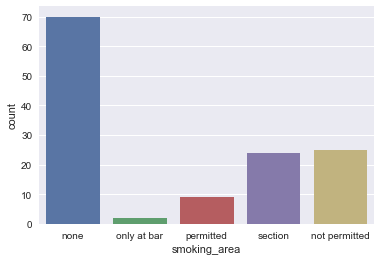

In [17]:
ax = sns.countplot(data = res_geo, x='smoking_area')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants do not have designated areas for smoking.
</span> 

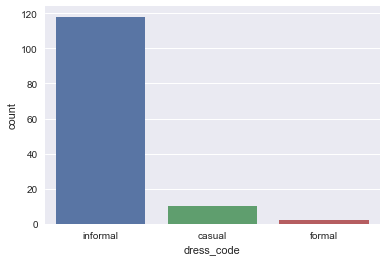

In [18]:
ax = sns.countplot(data = res_geo, x='dress_code')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants have informal dress code. We assume this is a general pattern.
</span> 

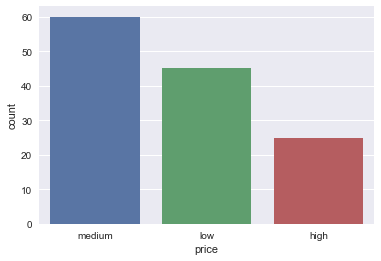

In [19]:
ax = sns.countplot(data = res_geo, x='price')
plt.show()

<span style="color:blue">
The plot shows that there are significant number of restaurants in each price category. This makes the sample representative of population
</span> 

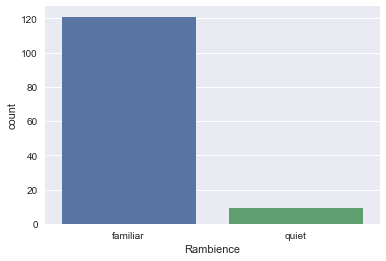

In [20]:
ax = sns.countplot(data = res_geo, x='Rambience')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants have a familiar ambience. This makes sense and we assume restaurants generally have a familiar ambience and this is not an outlier.
</span> 

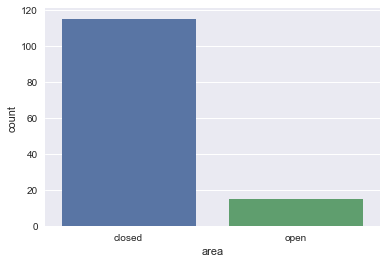

In [21]:
ax = sns.countplot(data = res_geo, x='area')
plt.show()

<span style="color:blue">
The plot shows that majority of the restaurants have closed areas. This makes sense and we assume restaurants usually have closed spaces.
</span> 

Based on above data, we can notice that there is an agreement/similar pattern between users and restaurants.

1) Most of the users prefer cash and most restaurants accept cash than credit/debit cards. 

2) Most of the users use public transport and most restaurants do not provide parking.

3) Most of the users prefer low to medium budget and most restaurants are low to medium priced.

4) Most of the users prefer family and friendly ambiences and most restaurants have familiar ambience

So there is a mutual representation of restaurant profile and user preferences

## Step 2: Data cleaning is completed.

## Step 3: Data Integration begins! 

<span style="color:blue">
We have seen in the Step-1 that there are multiple rows for a given place ID. For example, a restaurant offers different type of parking options. these options are currently divided into several rows for a restaurant. We are performing the steps below to perform data integration:
</span>

<span style="color:blue">
1) Combine multiple rows for a given placeID
</span>

<span style="color:blue">
2) Merge dataframes for a given placeID
</span>

In [22]:
#The below function is created to combine multiple rows for a given placeID
def create_resdictdf(res_df):
    merge_column = res_df.columns[1]
    placeID_list = res_df['placeID'].unique()
    res_col_dict = {}
    for placeID in placeID_list:
        res_col_list = res_df[merge_column][res_df['placeID']==placeID].tolist()
        res_col_dict[placeID] = res_col_list

    res_dictdf = pd.DataFrame(columns= res_df.columns)
    for key in res_col_dict:
        res_dictdf = res_dictdf.append({'placeID':key, merge_column: res_col_dict[key]}, ignore_index = True)
    
    res_dictdf['placeID'] = res_dictdf['placeID'].astype('int64')
    return res_dictdf

In [23]:
res_payment1 = create_resdictdf(res_payment)
print(res_payment1.head(3))
res_parking1 = create_resdictdf(res_parking)
print(res_parking1.head(3))


   placeID                                           Rpayment
0   135110  [cash, VISA, MasterCard-Eurocard, American_Exp...
1   135109                                             [cash]
2   135107  [cash, VISA, MasterCard-Eurocard, American_Exp...
   placeID parking_lot
0   135111    [public]
1   135110      [none]
2   135109      [none]


In [24]:
# Doing it similarly for hours data. The hours data differs to that of parking or cuisine or payment.
# So we are writing a new function here.
res_hours['days_hours'] = '[' + res_hours['days'] + ']:[' + res_hours['hours'] + ']'
placeID_list = res_hours['placeID'].unique()
res_hours_dict = {}
for placeID in placeID_list:
    res_hours_list = res_hours['days_hours'][res_hours['placeID']==placeID].tolist()
    res_hours_dict[placeID] = res_hours_list
    
res_hours1 = pd.DataFrame(columns= ['placeID', 'days_hours'])
for key in res_hours_dict:
    res_hours1 = res_hours1.append({'placeID':key, 'days_hours': res_hours_dict[key]}, ignore_index = True)

res_hours1['placeID'] = res_hours1['placeID'].astype('int64') 
print(res_hours1.head(3))

   placeID                                         days_hours
0   135111  [[Mon;Tue;Wed;Thu;Fri;]:[00:00-23:30;], [Sat;]...
1   135110  [[Mon;Tue;Wed;Thu;Fri;]:[08:00-19:00;], [Sat;]...
2   135109  [[Mon;Tue;Wed;Thu;Fri;]:[08:00-21:00;], [Sat;]...


<span style="color:blue">
The rows in three dataframes res_hours, res_parking and res_payment are combined.
For res_cuisine we cannot perform the above because the cuisines are one of the top most important features in predicting the top restaurants.So we would like to perform one hot encoding to transform the values
    </span>

In [25]:
res_cuisine1 = pd.get_dummies(res_cuisine,columns=['Rcuisine'])
res_cuisine1 = res_cuisine1.groupby('placeID',as_index=False).sum()
res_cuisine1.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print(res_cuisine1.isnull().sum().sum())

0


<span style="color:blue">
Now we have merged all the rows for each restaurant data file for a given placeID.
</span>


<span style="color:blue">
When we combine all the 5 data files we can calculate the total number of restuarants.
</span>

In [27]:
total_no_restuarants = res_payment['placeID']
total_no_restuarants = total_no_restuarants.append([res_cuisine['placeID'],
                                                    res_hours['placeID'],
                                                    res_parking['placeID'], 
                                                    res_geo['placeID']])
total_no_restuarants = total_no_restuarants.drop_duplicates()
print("Total number of restaurants {}.".format(len(total_no_restuarants)))

Total number of restaurants 938.


In [28]:
res_total = pd.DataFrame(total_no_restuarants)
print(res_total.head())

    placeID
0    135110
5    135109
6    135107
11   135106
14   135105


In [29]:
res_total = res_total.reset_index(drop=True)
res_total.head()

,placeID
0,135110
1,135109
2,135107
3,135106
4,135105


<span style="color:blue">
Merging all restaurant data into one dataframe
</span>

In [30]:
res_total = pd.merge(left= res_total, right= res_payment1, how='left',  on='placeID')
res_total = pd.merge(left= res_total, right= res_cuisine1, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_hours1, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_parking1, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_geo, how='left', on='placeID')
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135110,"[cash, VISA, MasterCard-Eurocard, American_Exp...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135109,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
2,135107,"[cash, VISA, MasterCard-Eurocard, American_Exp...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135106,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
4,135105,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(res_total.shape)

(938, 83)


<span style="color:blue">
So now, res_total is the final dataframe containing restaurant level data.
On the other hand, we have users data in 3 reports
Similar to restaurants, there are multiple rows for one user. So we are combining these rows into one
</span>

In [32]:
# We are creating a function below to combine multiple rows for user dataframe into one.
def create_userdictdf(user_df):
    merge_column = user_df.columns[1]
    userID_list = user_df['userID'].unique()
    user_col_dict = {}
    for userID in userID_list:
        user_col_list = user_df[merge_column][user_df['userID']==userID].tolist()
        user_col_dict[userID] = user_col_list

    user_dictdf = pd.DataFrame(columns= user_df.columns)
    for key in user_col_dict:
        user_dictdf = user_dictdf.append({'userID':key, merge_column: user_col_dict[key]}, ignore_index = True)
    
    return user_dictdf

In [33]:
user_cuisine1 = create_userdictdf(user_cuisine)
user_payment1 = create_userdictdf(user_payment)
user_cuisine1.head()

,userID,Rcuisine
0,U1001,[American]
1,U1002,[Mexican]
2,U1003,[Mexican]
3,U1004,"[Bakery, Breakfast-Brunch, Japanese, Contempor..."
4,U1005,[American]


In [34]:
user_payment1.head()

,userID,Upayment
0,U1001,[cash]
1,U1002,[cash]
2,U1003,[cash]
3,U1004,"[cash, bank_debit_cards]"
4,U1005,[cash]


In [35]:
user_cuisine1 = pd.get_dummies(user_cuisine,columns=['Rcuisine'])
user_cuisine1 = user_cuisine1.groupby('userID',as_index=False).sum()
user_cuisine1.head()

,userID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Australian,Rcuisine_Austrian,Rcuisine_Bagels,Rcuisine_Bakery,...,Rcuisine_Swiss,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,U1001,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style="color:blue">
    Now we have merged all the rows for each user data file for a given userID.
When we combine all the 3 data files we can calculate the total number of users.
    </span>

In [36]:
total_no_users = user_cuisine1['userID']
total_no_users = total_no_users.append([user_payment1['userID'],
                                                    user_profile['userID']])
total_no_users = total_no_users.drop_duplicates()
print("Total number of users {}.".format(len(total_no_users)))

Total number of users 138.


In [37]:
user_total = pd.DataFrame(total_no_users)
user_total.head()

,userID
0,U1001
1,U1002
2,U1003
3,U1004
4,U1005


In [38]:
user_total = user_total.reset_index(drop=True)
user_total.head()

,userID
0,U1001
1,U1002
2,U1003
3,U1004
4,U1005


In [39]:
user_total = pd.merge(left= user_total, right= user_profile, how='left', on='userID')
user_total = pd.merge(left= user_total, right= user_cuisine1, how='left', on='userID')
user_total = pd.merge(left= user_total, right= user_payment1, how='left', on='userID')

user_total.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,0,0,0,0,0,0,0,0,0,[cash]
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,[cash]
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,[cash]
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,"[cash, bank_debit_cards]"
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,[cash]


In [40]:
user_total.shape

(138, 123)

<span style="color:blue">
So now, user_total is the final dataframe containing all user level data.
Overall we have integrated data from 9 reports to 3 dataframes - res_total, user_total, final_rating
</span>


## Step 3: Data Integration is completed

## Step 4: Data Reduction begins!

<span style="color:blue">
Now we would like to perform **data reduction** by aiming to reduce the rows and features.
The final rating data contains the actual restaurants containing ratings. So we would like to focus only on these restaurants.
</span>

In [41]:
print(res_total.shape)
print(final_rating.shape)
final_rating_placeID_list = final_rating['placeID'].unique()
res_total = res_total[res_total['placeID'].isin(final_rating_placeID_list)]
print(res_total.shape)

(938, 83)
(1161, 5)
(130, 83)


In [42]:
res_total = res_total.reset_index(drop=True)
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
1,135106,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
2,135104,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Full_Bar,not permitted,informal,completely,medium,?,familiar,t,closed,variety
3,135088,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No_Alcohol_Served,not permitted,informal,no_accessibility,low,www.cenidet.edu.mx,quiet,f,closed,none
4,135086,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,t,closed,none


<span style="color:blue">
Given that user data does not contain any information regarding hours, the_geom_meter, and other features, we would like to drop these features from restaurant data. 
    </span>

In [43]:
print(res_total.shape)
res_total = res_total.drop(['days_hours','the_geom_meter','country', 'name', 'address', 'city', 'state','zip', 'latitude','longitude','fax'], axis=1)
print(res_total.shape)

(130, 83)
(130, 72)


In [44]:
print(res_total.isnull().sum().sum())

2081


In [45]:
res_total = res_total.fillna(0)
print(res_total.isnull().sum().sum())

0


<span style="color:blue">
After we filtered the restaurants that have the rating, we can see that some of these restaurants do not have any values for some cuisines. All values are 0 in a given column. They would not add any valuable information. So we are dropping these columns
    </span>

In [46]:
print(res_total.shape)
res_total = res_total.loc[:, (res_total != 0).any(axis=0)]
print(res_total.shape)

(130, 72)
(130, 36)


<span style="color:blue">
Similarly, there are many user features that we assume are not related to restaurant rating. These include: 
interest, personality,	religion, activity,	color,	weight 
    </span>

In [47]:
print(user_total.shape)
user_total = user_total.drop(['religion','personality','activity', 'color', 'interest', 'weight', 'height', 'marital_status','hijos','latitude', 'longitude', 'birth_year'], axis=1)
print(user_total.shape)

(138, 123)
(138, 111)


In [48]:
user_total['Upayment'] = user_total['Upayment'].fillna('cash')

In [49]:
print(user_total.shape)
user_total = user_total.loc[:, (user_total != 0).any(axis=0)]
print(user_total.shape)

(138, 111)
(138, 111)


## Step 4: Data Reduction is now completed.

## Step 5: Data Transformation begins!

<span style="color:blue">
For our analysis, we would need the data to be numeric.
So here we are exploring data and make assumptions to map the data to numerical values.
    </span>

<span style="color:blue">
We will start with parking data by performing frequency distribution to explore the parking options
    <span>

In [50]:
multiple_parking_rows = 0
for k in res_total['parking_lot']:
    if len(k) > 1:
        multiple_parking_rows += 1
        print('There are rows with multiple parking options')
print(multiple_parking_rows)

0


<span style="color:blue">
After we filtered the restaurants with ratings, all these 138 restaurants have only one parking option. So we are converting the list to the value
    </span>

In [51]:
res_total['parking_lot'] = res_total['parking_lot'].apply(lambda x:x[0])
res_total['parking_lot'].value_counts()

none             65
yes              46
public           16
valet parking     3
Name: parking_lot, dtype: int64

<span style="color:blue">
Parking is one of the important features for a given restaurant, so if the restaurant has no parking then we will give a value of 0. If it is available, we will give a value 1.
    </span>

In [52]:
res_total['parking_lot'] = res_total.parking_lot.map({'none':0, 'public':1, 'yes':1, 'valet parking':1})
res_total['parking_lot'].value_counts()

1    65
0    65
Name: parking_lot, dtype: int64

In [53]:
res_total['alcohol'].value_counts()

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64

<span style="color:blue">
We assume alcohol to be a significant feature for a restaurant. So if the restaurant serves alcohol, we give it a value 1 and if not 0.</span>

In [54]:
res_total['alcohol'] = res_total['alcohol'].map(lambda x: 0 if x == 'No_Alcohol_Served' else 1)
res_total['alcohol'].value_counts()

0    87
1    43
Name: alcohol, dtype: int64

In [55]:
res_total['smoking_area'].value_counts()

none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64

<span style="color:blue">
We assume that if a restaurant has a designated smoking area, it is a nice feature. So for values - 'section' and 'only at bar', we will give value 1 and all others 0
    </span>

In [56]:
res_total['smoking_area'] = res_total['smoking_area'].map(lambda x: 1 if (x == 'none') | (x == 'not permitted') else 0)
res_total['smoking_area'].value_counts()

1    95
0    35
Name: smoking_area, dtype: int64

In [57]:
res_total['other_services'].value_counts()

none        119
variety       7
Internet      4
Name: other_services, dtype: int64

<span style="color:blue">
If there is an additional service offered by the restaurant, we assume it will make the restaurant more welcoming. Therefore, we will give value 1 for any additional service and 0 if not offered.
    </span>

In [58]:
res_total['other_services'] = res_total['other_services'].map(lambda x: 0 if x == 'none'  else 1)
res_total['other_services'].value_counts()

0    119
1     11
Name: other_services, dtype: int64

In [59]:
res_total['price'].value_counts()

medium    60
low       45
high      25
Name: price, dtype: int64

<span style="color:blue">
We assume high priced restaurants generally offer better features. So we will give 1 for low, 2 for medium and 3 for high priced restauarants
    </span>

In [60]:
res_total['price'] = res_total['price'].map({'low': 1, 'medium': 2, 'high': 3})
res_total['price'].value_counts()

2    60
1    45
3    25
Name: price, dtype: int64

In [61]:
res_total['dress_code'].value_counts()

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64

<span style="color:blue">
Given that formal restaurants tend to have higher rating, we will give formal dress code value 1 and others 0
    </span>

In [62]:
res_total['dress_code'] = res_total['dress_code'].map({'informal':0, 'casual':0, 'formal': 1})
res_total['dress_code'].value_counts()

0    128
1      2
Name: dress_code, dtype: int64

In [63]:
res_total['accessibility'].value_counts()

no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64

<span style="color:blue">
An accessibility feature in a restaurant is an important feature and can be useful to the users. Therefore we are giving no accessbility as 0 and partial 1 and complete as 2
    </span>

In [64]:
res_total['accessibility'] = res_total['accessibility'].map({'no_accessibility':0, 'partially':1, 'completely': 2})
res_total['accessibility'].value_counts()

0    76
2    45
1     9
Name: accessibility, dtype: int64

In [65]:
res_total['Rambience'].value_counts()

familiar    121
quiet         9
Name: Rambience, dtype: int64

<span style="color:blue">
The dataset did not explain about the ambience. The word familiar for ambience is not fully self-explanatory. Given that most of the restaurants have familiar ambience, we will assign value 1 for familiar and 0 for quiet
    </span>

In [66]:
res_total['Rambience'] = res_total['Rambience'].map({'familiar':1, 'quiet': 0})
res_total['Rambience'].value_counts()

1    121
0      9
Name: Rambience, dtype: int64

In [67]:
res_total['area'].value_counts()

closed    115
open       15
Name: area, dtype: int64

<span style="color:blue">
A closed restaurant might generally be favorable to a wide number of users. Therefore we are assigning value 1 to closed area restaurants and 0 to open areas restaurants.

In [68]:
res_total['area'] = res_total['area'].map({'open':0, 'closed':1})
res_total['area'].value_counts()

1    115
0     15
Name: area, dtype: int64

In [69]:
res_payment['Rpayment'].value_counts()

cash                   500
MasterCard-Eurocard    194
VISA                   172
American_Express       153
bank_debit_cards       130
Visa                    83
Diners_Club             42
Discover                11
checks                  10
gift_certificates        7
Carte_Blanche            7
Japan_Credit_Bureau      5
Name: Rpayment, dtype: int64

In [70]:
user_payment['Upayment'].value_counts()

cash                   131
bank_debit_cards        22
VISA                    17
MasterCard-Eurocard      4
American_Express         3
Name: Upayment, dtype: int64

In [71]:
user_payment['Upayment'] = user_payment['Upayment'].apply(lambda x:x[0] if type(x)==list else x)

<span style="color:blue">
    Given that the dataset origin is from Mexico, based on our general knowledge, we assume people in Mexico would like to perform transactions in cash. So if the restaurant accepts cash, we would like give it a higher value of 2. If it does not accept cash, we would like to give it a value of 1

In [72]:
res_total['Rpayment'] = res_total['Rpayment'].apply(lambda x:x[0] if type(x)==list else x)
res_total['Rpayment'] = res_total['Rpayment'] .map({'cash':2, 'VISA':1})
res_total['Rpayment'] = res_total['Rpayment'].fillna(0)
res_total['Rpayment'] = res_total['Rpayment'].astype('int64')

In [73]:
res_total['franchise'].value_counts()

f    108
t     22
Name: franchise, dtype: int64

<span style="color:blue">
The dataset did not explain the franchise feature. We assume f means franchise and also that  franchise restaurants are popular based on the above distribution of the restaurants. Therefore, we will assign value 1 for f and 0 otherwise

In [74]:
res_total['franchise'] = res_total['franchise'].map({'f':1, 't':0})
res_total['franchise'].value_counts()

1    108
0     22
Name: franchise, dtype: int64

In [75]:
res_total['url'].value_counts()

?                        116
lacantinaslp.com           2
www.cenidet.edu.mx         1
lagranvia.com.mx           1
sushi-itto.com.mx          1
eloceanodorado.com         1
lostoneles.com.mx          1
chilis.com.mx              1
lunacafe.com.mx            1
no                         1
lasmananitas.com.mx        1
carlosandcharlies.com      1
kikucuernavaca.com.mx      1
reyecito.com               1
Name: url, dtype: int64

<span style="color:blue">
A restaurant with URL is usually favourable to the users. In the dataset, there are many restaurants with url information indicated as '?'. We assume '?' means unknown and therefore assign value 1 when there is a url and 0 for all other cases.

In [76]:
res_total['url'] = res_total['url'].replace('?',0)
res_total['url'] = res_total['url'].replace('no',0)
res_total['url'] = res_total['url'].apply(lambda x:1 if x!=0 else x)
res_total['url'].value_counts()

0    117
1     13
Name: url, dtype: int64

In [77]:
res_total.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,2,0,0,1,1,1
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,2,0,1,1,0,0
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,2,2,0,1,0,1,1
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,1,0,1,1,0
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,2,0,1,0,1,0


<span style="color:blue">
Here, we are grouping the cuisines into major categories to reduce number of redundant/related features.

In [78]:
res_total['Rcuisine_Bar_Pub'] = np.zeros(res_total.shape[0])
i_total = ((res_total.Rcuisine_Bar == 1) | (res_total.Rcuisine_Bar_Pub_Brewery == 1))
res_total.loc[i_total,'Rcuisine_Bar_Pub'] = 1

res_total['Rcuisine_Asian'] = np.zeros(res_total.shape[0])
i_total = ((res_total.Rcuisine_Chinese == 1) | (res_total.Rcuisine_Japanese == 1) | (res_total.Rcuisine_Vietnamese == 1))
res_total.loc[i_total,'Rcuisine_Asian'] = 1

res_total['Rcuisine_Western'] = np.zeros(res_total.shape[0])
i_total = ((res_total.Rcuisine_Armenian == 1) | (res_total.Rcuisine_Italian == 1) | (res_total.Rcuisine_Mediterranean == 1) 
         | (res_total.Rcuisine_Pizzeria == 1) | (res_total.Rcuisine_Seafood == 1))
res_total.loc[i_total,'Rcuisine_Western'] = 1

res_total['Rcuisine_American_Burgers'] = np.zeros(res_total.shape[0])
i_total = ((res_total.Rcuisine_American == 1) | (res_total.Rcuisine_Burgers == 1))
res_total.loc[i_total,'Rcuisine_American_Burgers'] = 1

res_total['Rcuisine_Others'] = np.zeros(res_total.shape[0])
i_total = (((res_total.Rcuisine_Bakery == 1) | (res_total["Rcuisine_Breakfast-Brunch"] == 1) | (res_total["Rcuisine_Cafe-Coffee_Shop"] == 1) 
        | (res_total.Rcuisine_Contemporary == 1) | (res_total.Rcuisine_Family == 1) | (res_total.Rcuisine_Game == 1) 
        | (res_total.Rcuisine_International == 1) | (res_total.Rcuisine_Regional == 1)))
res_total.loc[i_total,'Rcuisine_Others'] = 1



In [79]:
columns_to_drop = [ 'Rcuisine_American', 'Rcuisine_Armenian', 'Rcuisine_Bakery', 'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery',
       'Rcuisine_Breakfast-Brunch', 'Rcuisine_Burgers', 'Rcuisine_Cafe-Coffee_Shop',  'Rcuisine_Chinese',
       'Rcuisine_Contemporary', 'Rcuisine_Family', 'Rcuisine_Game', 'Rcuisine_International', 'Rcuisine_Italian',
       'Rcuisine_Japanese', 'Rcuisine_Mediterranean',  'Rcuisine_Pizzeria', 'Rcuisine_Regional', 'Rcuisine_Seafood',
       'Rcuisine_Vietnamese']
res_total = res_total.drop(columns_to_drop, axis=1)

<span style="color:blue">
We have completed the data transformation on restaurant dataframe. Similarly, we will do now on user dataframe

In [80]:
user_total.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,budget,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,...,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese,Upayment
0,U1001,false,abstemious,informal,family,on foot,medium,0,0,1,...,0,0,0,0,0,0,0,0,0,[cash]
1,U1002,false,abstemious,informal,family,public,low,0,0,0,...,0,0,0,0,0,0,0,0,0,[cash]
2,U1003,false,social drinker,formal,family,public,low,0,0,0,...,0,0,0,0,0,0,0,0,0,[cash]
3,U1004,false,abstemious,informal,family,public,medium,0,0,0,...,0,0,0,0,0,0,0,0,0,"[cash, bank_debit_cards]"
4,U1005,false,abstemious,no preference,family,public,medium,0,0,1,...,0,0,0,0,0,0,0,0,0,[cash]


In [81]:
user_total['smoker'].value_counts()

false    112
true      26
Name: smoker, dtype: int64

<span style="color:blue">
As we have given value 1 for restaurants that have designated smoking areas, we will assign value 1 for users with smoker as true

In [82]:
user_total['smoker'] = user_total['smoker'].map({'false': 0, 'true': 1})
user_total['smoker'].value_counts()

0    112
1     26
Name: smoker, dtype: int64

In [83]:
user_total['dress_preference'].value_counts()

no preference    58
formal           41
informal         35
elegant           4
Name: dress_preference, dtype: int64

<span style="color:blue">
As we have given value 1 for restaurants that require formal dress code, we will assign value 1 for users with formal and elegant dress preference

In [84]:
user_total['dress_preference'] = user_total['dress_preference'].map({'informal':0, 'no preference':0, 'elegant':1, 'formal': 1})
user_total['dress_preference'].value_counts()

0    93
1    45
Name: dress_preference, dtype: int64

In [85]:
user_total['drink_level'].value_counts()

abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64

<span style="color:blue">
As we have given value 1 for restaurants that allow drinking, we will assign value 1 for users who are casual and social drinkers.

In [86]:
user_total['drink_level'] = user_total['drink_level'].map({'abstemious': 0, 'casual drinker': 1, 'social drinker': 1})
user_total['drink_level'].value_counts()

1    87
0    51
Name: drink_level, dtype: int64

In [87]:
user_total['transport'].value_counts()

public       89
car owner    35
on foot      14
Name: transport, dtype: int64

<span style="color:blue">
As we have given value 1 for restaurants that provide parking, we will assign value 1 for users who are car owners and others 0

In [88]:
user_total['transport'] = user_total['transport'].map({'public': 0, 'car owner': 1, 'on foot': 0})
user_total['transport'].value_counts()

0    103
1     35
Name: transport, dtype: int64

In [89]:
user_total['budget'].value_counts()

medium    98
low       35
high       5
Name: budget, dtype: int64

<span style="color:blue">
As we have given value 1 for low priced, 2 for medium priced and 3 for high priced restaurants, similarly, we will assign values -  1 for low budget users, 2 for medium budget users and 3 for high budget users

In [90]:
user_total['budget'] = user_total['budget'].map({'low':1, 'medium':2, 'high':3})
user_total['budget'].value_counts()

2    98
1    35
3     5
Name: budget, dtype: int64

In [91]:
user_total['ambience'].value_counts()

family      76
friends     46
solitary    16
Name: ambience, dtype: int64

<span style="color:blue">
Given that we have assigned restaurants with familiar ambience as 1 and quiet as 0, we will similarly assign values 1 for family and friends, 0 for solitary

In [92]:
user_total['ambience'] = user_total['ambience'].map({'family':1, 'friends':1, 'solitary':0})
user_total['ambience'].value_counts()

1    122
0     16
Name: ambience, dtype: int64

<span style="color:blue">
As mentioned before, we are assuming Mexico to be a cash-driven economy. So we are assigning users with cash preference with value 2 and others with 1


In [93]:
user_total['Upayment'] = user_total['Upayment'].apply(lambda x:x[0] if type(x)==list else x)
user_total['Upayment'] = user_total['Upayment'] .map({'cash':2, 'VISA':1, 'bank_debit_cards':1, 'MasterCard-Eurocard':1, 'American_Express':1})
user_total['Upayment'] = user_total['Upayment'].fillna(0)
user_total['Upayment'] = user_total['Upayment'].astype('int64')
user_total['Upayment'].value_counts()

2    117
1     21
Name: Upayment, dtype: int64

<span style="color:blue">
Overall there are more than 100 types of cuisines. It would be complex to predict rating based on 100+ cuisines. Also, many cuisines are related.So we are grouping these cuisines into 8 major categories.

In [94]:
user_total['Rcuisine_Bar_Pub'] = np.zeros(user_total.shape[0])
i_total = ((user_total.Rcuisine_Bar == 1) | (user_total.Rcuisine_Bar_Pub == 1))
user_total.loc[i_total,'Rcuisine_Bar_Pub'] = 1



user_total['Rcuisine_Asian'] = np.zeros(user_total.shape[0])
i_total = (
            (user_total.Rcuisine_Japanese==1) | (user_total.Rcuisine_Korean==1) | 
(user_total['Rcuisine_Indian-Pakistani']==1) | (user_total.Rcuisine_Lebanese==1) | 
(user_total.Rcuisine_Moroccan==1) | (user_total.Rcuisine_Chinese==1) | 
(user_total.Rcuisine_Afghan==1) | (user_total.Rcuisine_Middle_Eastern==1) | 
(user_total.Rcuisine_Mongolian==1) | (user_total.Rcuisine_Sushi==1) | 
(user_total.Rcuisine_Asian==1) | (user_total.Rcuisine_Turkish==1) | 
(user_total.Rcuisine_Mediterranean==1) | (user_total.Rcuisine_Israeli==1) | 
(user_total['Rcuisine_Russian-Ukrainian']==1) | (user_total.Rcuisine_Malaysian==1) | 
(user_total.Rcuisine_African==1) | (user_total.Rcuisine_Pacific_Northwest==1) | 
(user_total.Rcuisine_Persian==1) | (user_total.Rcuisine_Cambodian==1) | 
(user_total.Rcuisine_Pacific_Rim==1) | (user_total.Rcuisine_Tunisian==1) | 
(user_total.Rcuisine_Filipino==1) | (user_total.Rcuisine_Dim_Sum==1) | 
(user_total.Rcuisine_Thai==1) | (user_total.Rcuisine_Indonesian==1) | (user_total.Rcuisine_Tibetan==1) | 
(user_total.Rcuisine_Southeast_Asian==1) | (user_total.Rcuisine_Burmese==1) | 
(user_total.Rcuisine_North_African==1) | (user_total.Rcuisine_Vietnamese==1))
user_total.loc[i_total,'Rcuisine_Asian'] = 1

user_total['Rcuisine_Mexican'] = np.zeros(user_total.shape[0])
i_total = ((user_total.Rcuisine_Mexican==1) | (user_total.Rcuisine_Latin_American==1) | 
(user_total.Rcuisine_Cuban==1) | (user_total.Rcuisine_Spanish==1) | 
(user_total.Rcuisine_Peruvian==1) | (user_total.Rcuisine_Caribbean==1) | 
(user_total.Rcuisine_Jamaican==1) | (user_total.Rcuisine_Chilean==1) | 
(user_total.Rcuisine_Brazilian==1) | (user_total.Rcuisine_Southern==1))
user_total.loc[i_total,'Rcuisine_Mexican'] = 1

user_total['Rcuisine_Western'] = np.zeros(user_total.shape[0])
i_total = ((user_total['Rcuisine_Continental-European']==1) | (user_total.Rcuisine_Italian==1) | 
(user_total.Rcuisine_Portuguese==1) | (user_total.Rcuisine_Eastern_European==1) | 
(user_total.Rcuisine_Polynesian==1) | (user_total.Rcuisine_Polish==1) | 
(user_total.Rcuisine_Australian==1) | (user_total.Rcuisine_British==1) | 
(user_total.Rcuisine_Austrian==1) | (user_total.Rcuisine_Irish==1) | 
(user_total.Rcuisine_Southwestern==1) | (user_total.Rcuisine_German==1) | 
(user_total.Rcuisine_Ethiopian==1) | (user_total.Rcuisine_Romanian==1) | 
(user_total.Rcuisine_Greek==1) | (user_total.Rcuisine_Swiss==1) | 
(user_total['Rcuisine_Cajun-Creole']==1) | (user_total.Rcuisine_Armenian==1) | 
(user_total.Rcuisine_Hungarian==1) | (user_total['Rcuisine_Dutch-Belgian']==1) | 
(user_total.Rcuisine_Scandinavian==1) | (user_total.Rcuisine_French==1) )
user_total.loc[i_total,'Rcuisine_Western'] = 1

user_total['Rcuisine_American_Burgers'] = np.zeros(user_total.shape[0])
i_total = ( (user_total.Rcuisine_American==1) | (user_total.Rcuisine_Hawaiian==1) |
            (user_total.Rcuisine_Canadian==1) | (user_total.Rcuisine_California==1))
user_total.loc[i_total,'Rcuisine_American_Burgers'] = 1

user_total['Rcuisine_Others'] = np.zeros(user_total.shape[0])
i_total = ((user_total.Rcuisine_Bakery==1) | (user_total['Rcuisine_Breakfast-Brunch']==1) | 
(user_total.Rcuisine_Contemporary==1) | (user_total.Rcuisine_Bagels==1) | 
(user_total.Rcuisine_Family==1) | (user_total.Rcuisine_Juice==1) | 
(user_total.Rcuisine_Hot_Dogs==1) | (user_total.Rcuisine_Diner==1) | 
(user_total.Rcuisine_Fast_Food==1) | (user_total['Rcuisine_Deli-Sandwiches']==1) | 
(user_total.Rcuisine_Regional==1) | (user_total.Rcuisine_Fusion==1) | 
(user_total.Rcuisine_Barbecue==1) | (user_total.Rcuisine_Pizzeria==1) | 
(user_total.Rcuisine_Burgers==1) | (user_total['Rcuisine_Tex-Mex']==1) | 
(user_total.Rcuisine_Soup==1) | (user_total.Rcuisine_Game==1) | 
(user_total.Rcuisine_Doughnuts==1) | (user_total['Rcuisine_Dessert-Ice_Cream']==1) | 
(user_total.Rcuisine_Seafood==1) | (user_total['Rcuisine_Organic-Healthy']==1) | 
(user_total.Rcuisine_Steaks==1) | (user_total.Rcuisine_Vegetarian==1) | 
(user_total.Rcuisine_Tapas==1) | (user_total.Rcuisine_Eclectic==1) | 
(user_total.Rcuisine_Basque==1) | (user_total.Rcuisine_Tea_House==1) | 
(user_total.Rcuisine_International==1) | (user_total.Rcuisine_Indigenous==1) | 
(user_total.Rcuisine_Kosher==1) | (user_total.Rcuisine_Fine_Dining==1))
user_total.loc[i_total,'Rcuisine_Others'] = 1

<span style="color:blue">
Now that we have grouped the cuisines, we would like to drop the individual columns

In [95]:
user_total = user_total.drop(['Rcuisine_American',
'Rcuisine_Bakery', 'Rcuisine_Breakfast-Brunch', 'Rcuisine_Japanese', 'Rcuisine_Contemporary', 'Rcuisine_Bagels', 
'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Continental-European', 'Rcuisine_Family', 'Rcuisine_Juice', 'Rcuisine_Hawaiian',
'Rcuisine_Hot_Dogs', 'Rcuisine_Latin_American', 'Rcuisine_Korean', 'Rcuisine_Italian', 'Rcuisine_Diner', 'Rcuisine_Deli-Sandwiches',
'Rcuisine_Regional', 'Rcuisine_Fusion', 'Rcuisine_Portuguese', 'Rcuisine_Indian-Pakistani', 'Rcuisine_Eastern_European', 
'Rcuisine_Lebanese', 'Rcuisine_Moroccan', 'Rcuisine_Barbecue', 'Rcuisine_Polynesian', 'Rcuisine_Polish', 'Rcuisine_Chinese',
'Rcuisine_Pizzeria', 'Rcuisine_Burgers', 'Rcuisine_Afghan', 'Rcuisine_Middle_Eastern', 'Rcuisine_Mongolian', 'Rcuisine_Bar',
'Rcuisine_Cuban', 'Rcuisine_Tex-Mex', 'Rcuisine_Spanish', 'Rcuisine_Soup', 'Rcuisine_Sushi', 'Rcuisine_Game', 
'Rcuisine_Doughnuts', 'Rcuisine_Australian', 'Rcuisine_Dessert-Ice_Cream', 'Rcuisine_Seafood', 'Rcuisine_Turkish',
'Rcuisine_Organic-Healthy', 'Rcuisine_Steaks', 'Rcuisine_Mediterranean', 'Rcuisine_British', 'Rcuisine_Austrian',
'Rcuisine_Israeli', 'Rcuisine_Russian-Ukrainian', 'Rcuisine_Malaysian', 'Rcuisine_Vegetarian', 'Rcuisine_Peruvian',
'Rcuisine_Tapas', 'Rcuisine_Eclectic', 'Rcuisine_African', 'Rcuisine_Basque', 'Rcuisine_Canadian', 
'Rcuisine_Irish', 'Rcuisine_Southwestern', 'Rcuisine_Tea_House', 'Rcuisine_International', 'Rcuisine_Pacific_Northwest',
'Rcuisine_German', 'Rcuisine_Persian', 'Rcuisine_Ethiopian', 'Rcuisine_Romanian', 'Rcuisine_Cambodian', 'Rcuisine_Pacific_Rim',
'Rcuisine_Tunisian',  'Rcuisine_Filipino', 'Rcuisine_Dim_Sum', 'Rcuisine_Greek', 'Rcuisine_Thai', 'Rcuisine_Swiss',
'Rcuisine_Cajun-Creole', 'Rcuisine_Armenian', 'Rcuisine_Indigenous', 'Rcuisine_Bar_Pub', 'Rcuisine_Caribbean', 'Rcuisine_Indonesian',
'Rcuisine_Hungarian', 'Rcuisine_Dutch-Belgian', 'Rcuisine_Kosher', 'Rcuisine_Fine_Dining', 'Rcuisine_Jamaican', 'Rcuisine_Tibetan',
'Rcuisine_Southeast_Asian', 'Rcuisine_Burmese', 'Rcuisine_California', 'Rcuisine_Scandinavian', 'Rcuisine_Chilean', 'Rcuisine_North_African',
'Rcuisine_Vietnamese', 'Rcuisine_French', 'Rcuisine_Brazilian', 'Rcuisine_Southern' ], axis=1)

In [96]:
print(user_total.isnull().sum().sum())

0


In [97]:
print(res_total.isnull().sum().sum())

0


## Step 5: Data Transformation is completed.

## Step 6: Feature Engineering begins!

In [98]:
user_total1 = user_total.copy()
res_total1 = res_total.copy()

To perform feature engineering and selection, we will follow the steps below:

1) Integrate user and restaurant dataframes with rating dataframe. We will call this final_df.

2) Create a rating dataframe that resembles a matrix with row index as placeID and column index as userID. we will call this overall_rating. Initialize this matrix dataframe with '-1'. Then check rating for each userID and placeID combination. If a rating is available then, replace the '-1' with the rating. if the rating is not available, replace the '-1' with zero

In [99]:
final_df = pd.merge(left= res_total1, right= final_rating, how='left', on='placeID')
final_df = pd.merge(left= final_df, right= user_total, how='left', on='userID', suffixes=['_res', '_user'])
final_df.head()

,placeID,Rpayment,Rcuisine_Cafeteria_res,Rcuisine_Fast_Food_res,Rcuisine_Mexican_res,parking_lot,alcohol,smoking_area,dress_code,accessibility,...,budget,Rcuisine_Asian_user,Rcuisine_Bar_Pub_Brewery,Rcuisine_Cafeteria_user,Rcuisine_Fast_Food_user,Rcuisine_Mexican_user,Upayment,Rcuisine_Western_user,Rcuisine_American_Burgers_user,Rcuisine_Others_user
0,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,2,0.0,0.0,0.0
1,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,2,0.0,0.0,0.0
2,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,1,0.0,0.0,0.0
3,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,1,0.0,0.0,1.0
4,135106,2,0.0,0.0,1.0,0,1,0,0,1,...,2,0.0,0,0,0,0.0,2,0.0,0.0,1.0


<span style="color:blue">
Finding Correlation matrix between columns and target variable

In [100]:
cor_features1=final_df.copy()
cor_features1 = cor_features1.drop(columns=['placeID', 'userID'])

In [101]:
from scipy.stats import pearsonr
target_col_name = 'rating'
feature_target_corr = {}
for col in final_df:
    if target_col_name != col and col!= 'placeID' and col!= 'userID':
        feature_target_corr[col] = \
            pearsonr(final_df[col], final_df[target_col_name])[0]
print("Feature-Target Correlations")
feature_target_corr

Feature-Target Correlations


{'Rpayment': 0.019323397975326714,
 'Rcuisine_Cafeteria_res': 0.0024310166082252118,
 'Rcuisine_Fast_Food_res': -0.013202424777046536,
 'Rcuisine_Mexican_res': -0.0070636660507722646,
 'parking_lot': -0.004229383775589355,
 'alcohol': 0.045210394893900406,
 'smoking_area': -0.048497585981083405,
 'dress_code': 0.10416124792378081,
 'accessibility': -0.03769439865851669,
 'price': 0.09074519223574695,
 'url': 0.048594688623152305,
 'Rambience': -0.01079566511220449,
 'franchise': -0.011819126881603286,
 'area': 0.037051492827210285,
 'other_services': 0.06982308567470041,
 'Rcuisine_Bar_Pub': 0.013566935555827737,
 'Rcuisine_Asian_res': 0.021684607634337147,
 'Rcuisine_Western_res': -0.011308464080922918,
 'Rcuisine_American_Burgers_res': -0.03271424612864708,
 'Rcuisine_Others_res': 0.07694486824795206,
 'food_rating': 0.7148549832421072,
 'service_rating': 0.6907568315978132,
 'smoker': -0.05816366858957192,
 'drink_level': -0.054595629075978695,
 'dress_preference': 0.101609902289023

In [102]:
overall_rating = pd.DataFrame( np.zeros((len(res_total),len(total_no_users)))-1.0, 
                              columns=total_no_users, index=res_total['placeID'] )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy() 
for r, u, o, f, s in zip(final_rating.placeID, final_rating.userID, final_rating.rating, final_rating.food_rating, 
                         final_rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

review = pd.DataFrame( np.zeros(overall_rating.shape), columns=total_no_users, index=res_total['placeID'])
review[overall_rating >= 0] = 1


In [103]:
# Calculate the mean rating for each restaurant
def getMeanReviewRating(rating,review,column_name):

    rating = rating*review    
    rating[column_name] =  (np.sum(rating, axis=1)/np.sum((review == 1.0), axis=1))
    mean_df = pd.DataFrame(rating[column_name])
    return mean_df
Y_overall_mean = getMeanReviewRating(overall_rating,review, 'overall_rating')
Y_food_mean = getMeanReviewRating(food_rating,review, 'food_rating')
Y_service_mean = getMeanReviewRating(service_rating,review, 'service_rating')

In [104]:
#To analyse features, we are integrating the previously merged dataframe with mean rating dataframes
res_total_feature_analyse = res_total.copy()
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_overall_mean, how='left', on='placeID')
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_food_mean, how='left', on='placeID')
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_service_mean, how='left', on='placeID')
res_total_feature_analyse.head()

,placeID,Rpayment,Rcuisine_Cafeteria,Rcuisine_Fast_Food,Rcuisine_Mexican,parking_lot,alcohol,smoking_area,dress_code,accessibility,...,area,other_services,Rcuisine_Bar_Pub,Rcuisine_Asian,Rcuisine_Western,Rcuisine_American_Burgers,Rcuisine_Others,overall_rating,food_rating,service_rating
0,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,1,1,0.0,0.0,1.0,0.0,0.0,1.000000,1.250000,0.750000
1,135106,2,0.0,0.0,1.0,0,1,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,1.200000,1.200000,1.200000
2,135104,2,0.0,0.0,1.0,1,1,1,0,2,...,1,1,0.0,0.0,0.0,0.0,0.0,0.857143,1.428571,0.857143
3,135088,2,1.0,0.0,0.0,1,0,1,0,0,...,1,0,0.0,0.0,0.0,0.0,0.0,1.000000,1.166667,1.000000
4,135086,2,0.0,1.0,0.0,1,0,1,0,0,...,1,0,0.0,0.0,0.0,1.0,0.0,0.800000,0.600000,0.800000


In [105]:
# create a dataframe that analyse user_info features along with restaurant features with ratings
res_total_user_feature = final_df.copy()
res_total_user_feature.head()

,placeID,Rpayment,Rcuisine_Cafeteria_res,Rcuisine_Fast_Food_res,Rcuisine_Mexican_res,parking_lot,alcohol,smoking_area,dress_code,accessibility,...,budget,Rcuisine_Asian_user,Rcuisine_Bar_Pub_Brewery,Rcuisine_Cafeteria_user,Rcuisine_Fast_Food_user,Rcuisine_Mexican_user,Upayment,Rcuisine_Western_user,Rcuisine_American_Burgers_user,Rcuisine_Others_user
0,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,2,0.0,0.0,0.0
1,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,2,0.0,0.0,0.0
2,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,1,0.0,0.0,0.0
3,135109,2,0.0,0.0,0.0,0,1,1,0,0,...,2,0.0,0,0,0,0.0,1,0.0,0.0,1.0
4,135106,2,0.0,0.0,1.0,0,1,0,0,1,...,2,0.0,0,0,0,0.0,2,0.0,0.0,1.0


In [106]:
import matplotlib.pyplot as plt

# this method plots the restaurants features with mean ratings
def feature_groupby(df,group_by_column_name,Xlabel_names,Xlabel_range):
    groupby_overall = df['overall_rating'].groupby(df[group_by_column_name])
    groupby_food = df['food_rating'].groupby(df[group_by_column_name])
    groupby_service = df['service_rating'].groupby(df[group_by_column_name])
    plt.plot(groupby_overall.mean(), label='overall')
    plt.plot(groupby_food.mean(), label='food')
    plt.plot(groupby_service.mean(), label = 'service')
    plt.xticks(Xlabel_range, Xlabel_names)
    plt.legend()
    plt.xlabel(group_by_column_name)
    plt.ylabel('mean_rating')
    plt.show()
    
    

In [107]:
import matplotlib.pyplot as plt

# this method plots the restaurants features with mean ratings for various user groups
def feature_user_groupby(df,group_by_column_name,user_column_name,user_groups,Xlabel_names,Xlabel_range):
    for group_name,group in user_groups.items():              
        user_groupby_overall = df['rating'][df[user_column_name]== group].groupby(df[group_by_column_name])
        user_groupby_food = df['food_rating'][df[user_column_name]== group].groupby(df[group_by_column_name])
        user_groupby_service = df['service_rating'][df[user_column_name]== group].groupby(df[group_by_column_name])    
        plt.plot(user_groupby_overall.mean(), label='overall')
        plt.plot(user_groupby_food.mean(), label='food')
        plt.plot(user_groupby_service.mean(), label = 'service')
        plt.xticks(Xlabel_range, Xlabel_names)
        plt.legend()
        plt.xlabel(group_by_column_name)
        plt.ylabel('mean_rating')
        plt.title(group_name + ' ' + user_column_name)
        plt.show()
    
    
    

**Price vs Average restaurant ratings**

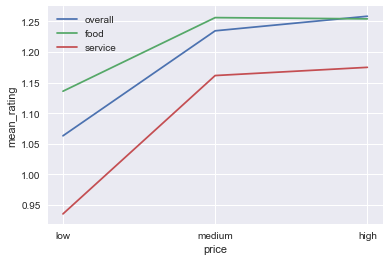

In [108]:
feature_groupby(res_total_feature_analyse,'price',['low', 'medium', 'high'],np.arange(1,4))

Here we are 1) grouping restaurants based on price 2) calculating the average rating for each group 3) plottting these mean values. Based on this graph, we can see that:

**Service Rating:**
Low priced restaurants have the lowest service rating. as the price increases, service rating increased but then it almost converged from medium to high priced ones. 

**Food Rating:**
Low priced restaurants have the lowest food rating. As the price increases, food rating increased. However, food rating is similar for both medium and high priced restaurants. This is an important observation

**Overall Rating:** Low priced restaurants have the lowest overall rating. As the price increases, overall rating increased. It is to be noticed that the medium priced and high priced only differed on the service level and not on the food level.

We can conclude that, you get what you pay for!

**Price vs Average restaurant ratings for users with different budgets**

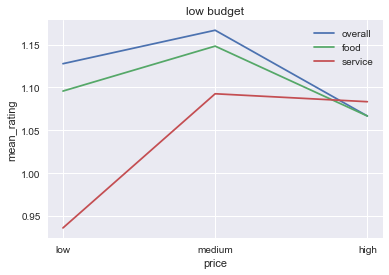

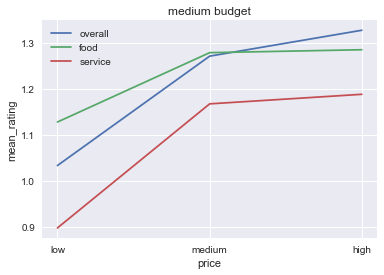

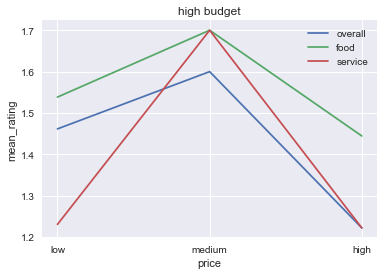

In [109]:
feature_user_groupby(res_total_user_feature,'price','budget', {'low':1,'medium':2,'high':3},['low', 'medium', 'high'],np.arange(1,4))

Here, we are plotting the ratings given by three groups of users who visited low, medium and high priced restaurants .
Medium priced restaurants are the preferred restaurants by all the three user groups.


** Parking Lot vs Average restaurant ratings **

In [110]:
res_total_feature_analyse['parking_lot'].value_counts()

1    65
0    65
Name: parking_lot, dtype: int64

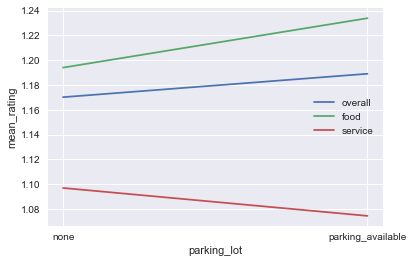

In [111]:
feature_groupby(res_total_feature_analyse,'parking_lot',['none', 'parking_available'],np.arange(0,2))

There is not a significant change in overall rating for restaurants with or without parking.

In [112]:
res_total_user_feature['transport'].value_counts()

0    848
1    313
Name: transport, dtype: int64

**Parking Lot vs Average restaurant ratings for users with different transport preferences**

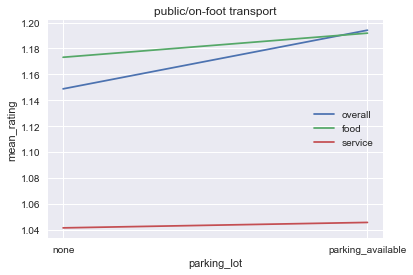

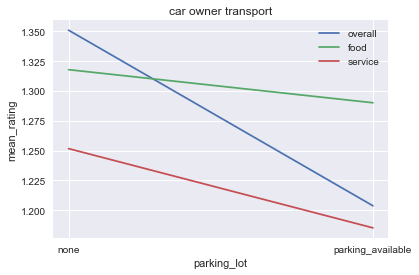

In [113]:
feature_user_groupby(res_total_user_feature,'parking_lot','transport', {'public/on-foot': 0, 'car owner': 1},['none', 'parking_available'],np.arange(0,2))

As expected, food rating did not change based on parking options. 
Overall there is no significant change in trend between car-owners and non-car owners

**Smoking area vs Average restaurant ratings**

In [114]:
res_total_feature_analyse['smoking_area'].value_counts()

1    95
0    35
Name: smoking_area, dtype: int64

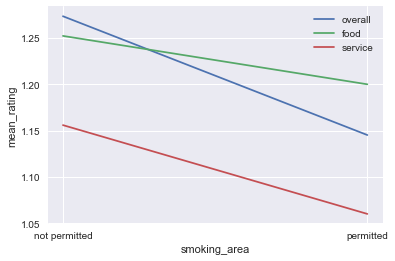

In [115]:
feature_groupby(res_total_feature_analyse,'smoking_area',['not permitted', 'permitted'],np.arange(0,2))

All Ratings have dropped for restaurants that permit smoking

**Smoking area vs Average restaurant ratings for differnet preferences of users**

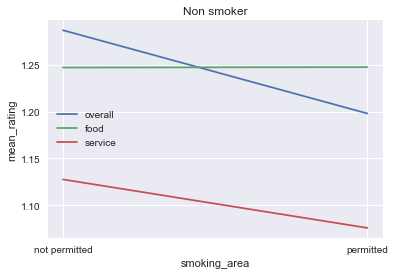

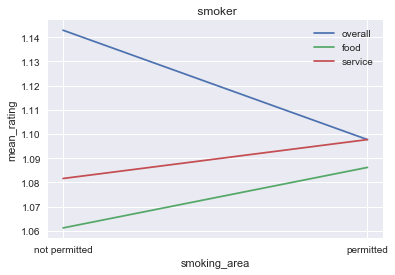

In [116]:
feature_user_groupby(res_total_user_feature,'smoking_area','smoker', {'Non': 0, '': 1},['not permitted', 'permitted'],np.arange(0,2))

Non-smokers gave better ratings for restaurants that do not permit smoking. We think this is natural. 
For smokers, there has not been an signifcant change in ratings.

**Alcohol served vs Average restaurant ratings **

In [117]:
res_total_feature_analyse['alcohol'].value_counts()

0    87
1    43
Name: alcohol, dtype: int64

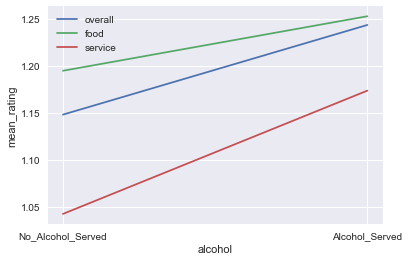

In [118]:
feature_groupby(res_total_feature_analyse,'alcohol',['No_Alcohol_Served', 'Alcohol_Served'],np.arange(0,2))

Restaurants that serve alcohol have higher ratings 

**Alcohol served vs Average restaurant ratings for users with alcohol preferences**

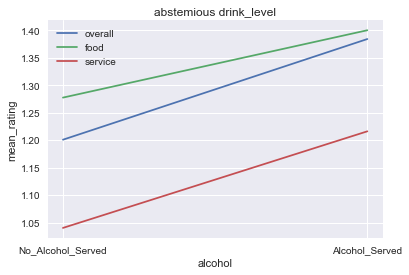

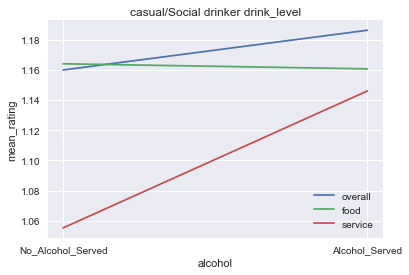

In [119]:
feature_user_groupby(res_total_user_feature,'alcohol','drink_level', {'abstemious': 0, 'casual/Social drinker': 1},['No_Alcohol_Served', 'Alcohol_Served'],np.arange(0,2))

Users who are drinkers gave better ratings for restaurants that serve alcohol.

**Other services provided by restaurant vs Average restaurant ratings**

In [120]:
res_total_feature_analyse['other_services'].value_counts()

0    119
1     11
Name: other_services, dtype: int64

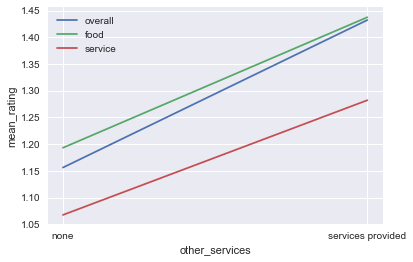

In [121]:
feature_groupby(res_total_feature_analyse,'other_services',['none', 'services provided'],np.arange(0,2))

Restaurants that provide additional services have higher ratings

**Dress Code mentioned by restaurants vs Average restaurant ratings**

In [122]:
res_total_feature_analyse['dress_code'].value_counts()

0    128
1      2
Name: dress_code, dtype: int64

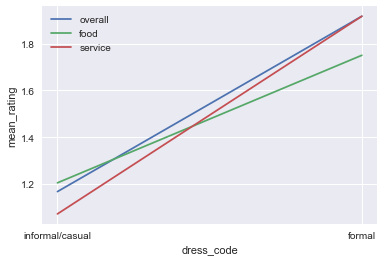

In [123]:
feature_groupby(res_total_feature_analyse,'dress_code',['informal/casual', 'formal'],np.arange(0,2))

Restaurants with formal dress code have higher ratings. Generally, they could be higher star restaurants.

**Dress Code mentioned by restaurants  vs Average restaurant ratings for users with different dress preferences**

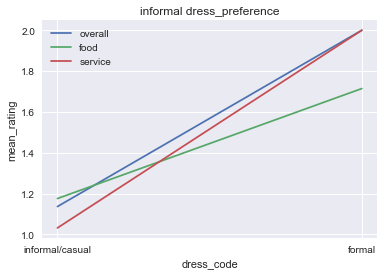

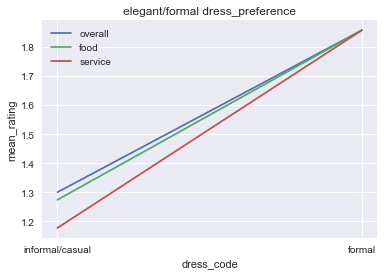

In [124]:
feature_user_groupby(res_total_user_feature,'dress_code','dress_preference', {'informal':0, 'elegant/formal':1},['informal/casual', 'formal'],np.arange(0,2))

Users who prefer informal dress code still gave higher ratings to the restaurants that have formal dress code.  This could be also because they are higher priced restaurants. Users who prefer elegant/formal dress gave higher rating to restaurants with formal dress code.

**Accessibility provided by restaurants  vs Average restaurant ratings**

In [125]:
res_total_feature_analyse['accessibility'].value_counts()

0    76
2    45
1     9
Name: accessibility, dtype: int64

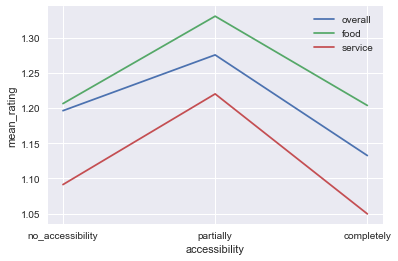

In [126]:
feature_groupby(res_total_feature_analyse,'accessibility',['no_accessibility', 'partially', 'completely'],np.arange(0,3))

We could not interpret the distribution for this feature as it is not fully clear why the ratings dropped from partially accessible to completely accessible restaurants.

**Type of Restaurant  vs Average restaurant ratings **

In [127]:
res_total_feature_analyse['area'].value_counts()

1    115
0     15
Name: area, dtype: int64

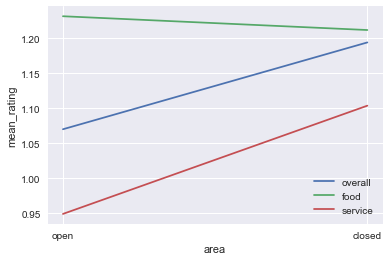

In [128]:
feature_groupby(res_total_feature_analyse,'area',['open', 'closed'],np.arange(0,2))

Closed restaurants have higher overall ratings. This makes sense as most users preferred closed space restaurants

**Cuisines provided by restaurants  vs Average restaurant ratings**

In [129]:
columns = ['Rcuisine_Mexican','Rcuisine_American_Burgers', 'Rcuisine_Asian','Rcuisine_Bar_Pub', 'Rcuisine_Cafeteria',
           'Rcuisine_Fast_Food','Rcuisine_Others','Rcuisine_Western']
overall_rating_cusine = []
food_rating_cusine = []
service_rating_cusine = []

for x in columns:
    overall_mean_value = res_total_feature_analyse['overall_rating'][res_total_feature_analyse[x]==1].mean()
    overall_rating_cusine.append(overall_mean_value)
    food_mean_value = res_total_feature_analyse['food_rating'][res_total_feature_analyse[x]==1].mean()
    food_rating_cusine.append(food_mean_value)
    service_mean_value = res_total_feature_analyse['service_rating'][res_total_feature_analyse[x]==1].mean()
    service_rating_cusine.append(service_mean_value)

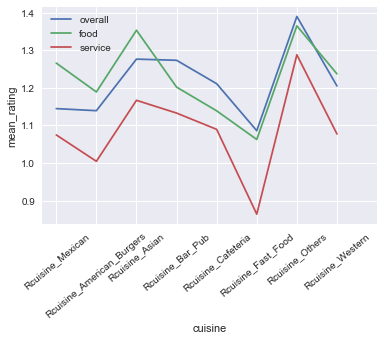

In [130]:
plt.plot(overall_rating_cusine, label='overall')
plt.plot(food_rating_cusine, label='food')
plt.plot(service_rating_cusine, label = 'service')
plt.xticks(np.arange(0,9),columns)
plt.xticks(rotation=40)
plt.legend()
plt.xlabel('cuisine')
plt.ylabel('mean_rating')
plt.show()


Rcuisine_Others cuisine got highest ratings among all the cuisine groups. Asian restaurants got the next higher ratings. Fastfood cuisine got lowest ratings.

In [131]:
# Here are we are calculating statistics from anova table.
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols(
    'overall_rating~ food_rating + service_rating + parking_lot + url + dress_code + alcohol + area + smoking_area + accessibility + price + Rambience', data=res_total_feature_analyse).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
food_rating,1.652159,1.0,56.576426,1.165176e-11
service_rating,1.671657,1.0,57.244124,9.267018e-12
parking_lot,0.002329,1.0,0.079748,7.781340e-01
url,0.000292,1.0,0.010012,9.204665e-01
dress_code,0.005054,1.0,0.173068,6.781552e-01
alcohol,0.007727,1.0,0.264618,6.079272e-01
area,0.114426,1.0,3.918397,5.008863e-02
smoking_area,0.119173,1.0,4.080953,4.563397e-02
accessibility,0.043317,1.0,1.483339,2.256826e-01
price,0.010695,1.0,0.366252,5.462167e-01


We can see that p value is less for most of the features we selected. This explains that these features are significant.

## Step 6: Feature Engineering is completed.

## Step 7: Model Selection and Evaluation begins!

In [132]:
final_df = final_df.drop(['food_rating','service_rating'], axis=1)


In [133]:
split = np.random.rand(len(final_df)) < 0.81
train_df = final_df[split]
test_df = final_df[~split]

X_train = train_df[train_df.columns.difference(['placeID','userID','rating'])]
y_train = train_df["rating"]
X_test = test_df[test_df.columns.difference(['placeID','userID','rating'])]
y_test = test_df["rating"]

In [134]:
feature_df = final_df[final_df.columns.difference(['placeID','userID'])]

** Linear Regression using kfold cross validation**

In [135]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
l_x=feature_df.loc[:, feature_df.columns != 'rating']
l_y=feature_df["rating"]
l_regr = linear_model.LinearRegression()
rmse_logistic_Scores = cross_val_score(l_regr, l_x, l_y, cv=10, scoring='neg_mean_squared_error')
print(rmse_logistic_Scores.mean() *-1)

0.7458835811540527


** K-nearest neighbors Regression using kfold cross-validation**

In [136]:
from sklearn.neighbors import KNeighborsRegressor
k_x=feature_df.loc[:, feature_df.columns != 'rating']
k_y=feature_df["rating"]
knn = KNeighborsRegressor()
# search for an optimal value of K for KN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, k_x, k_y, cv=10, scoring='neg_mean_squared_error')
    temp= scores*-1
    k_scores.append(temp.mean() ** (1/2))
print(k_scores)

[0.9939879695960807, 0.8739578442847208, 0.8401241142594655, 0.8139704495375164, 0.8077171624037076, 0.7983048433092258, 0.7901514259559753, 0.7810133372752147, 0.7757765739552512, 0.7773811617700284, 0.7736953955286572, 0.7758097786318211, 0.7749013089893616, 0.7742259448313209, 0.7735516103359609, 0.770793473561392, 0.7729702203593791, 0.7702001588336738, 0.7691308921887351, 0.7693382099665081, 0.7689063627687843, 0.7675077386195244, 0.7668014227603728, 0.7664905008591383, 0.767336346891141, 0.7655316701166667, 0.7668811028856826, 0.7660651025940234, 0.7661292217632293, 0.7665672814954373, 0.7663780089283779, 0.7675845338411038, 0.7682485704272034, 0.7699419857871662, 0.7700331926921524, 0.7686869420303208, 0.7667521609550202, 0.7670473886781186, 0.7660889890610514, 0.7649488362705709, 0.7658655965687173, 0.76614776276648, 0.7656015881908743, 0.7654791253305564, 0.7659619205104917, 0.7662016792859426, 0.7646326627166404, 0.7653941906740304, 0.765815912137505]


Text(0,0.5,'RMSE')

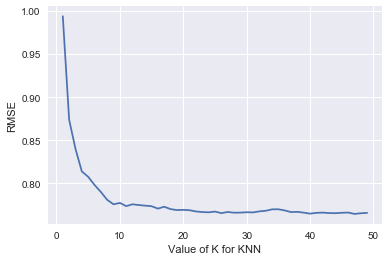

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')

RMSE curve converges and remains constant after the k value of 10

In [138]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsRegressor(n_neighbors=10)
k_mse=(cross_val_score(knn, k_x, k_y, cv=10, scoring='neg_mean_squared_error').mean() * -1 )
k_rmse=k_mse ** (1/2)
print(k_rmse)

0.7773811617700284


Linear Regression has low RMSE compared to KNN model
So, Linear regression model performs better than kNN model. So we are using linear regression model to predict the ratings for the restaurants that user has not rated yet.

## Step 7: Model Selection and Evaluation completed.

## Step 8: Restaurant Recommendation begins!

** For one particular user, we will predict the ratings for the restaurants that the user didnot give and then suggests the top 5 restaurants from the overall restaurant dataset.
we choose user U1030
**

In [139]:
ratings_to_be_predicted_test = pd.DataFrame()
ratings_to_be_predicted_test['userID'] = user_total['userID']
ratings_to_be_predicted_test['tmp'] =1
unique_restuarants = pd.DataFrame()
unique_restuarants['placeID'] = res_total['placeID']
unique_restuarants['tmp'] =1
ratings_to_be_predicted_test = pd.merge(ratings_to_be_predicted_test, unique_restuarants,on='tmp')
ratings_to_be_predicted_test = ratings_to_be_predicted_test.drop(columns = ['tmp'])

In [140]:
ratings_to_be_predicted_test = pd.merge(left= ratings_to_be_predicted_test, right= res_total, how='left',  on='placeID')


In [141]:
ratings_to_be_predicted_test = pd.merge(left= ratings_to_be_predicted_test, right= user_total, how='left',  on='userID', suffixes=['_res', '_user'])

In [142]:
ratings_to_be_predicted_test = pd.merge(ratings_to_be_predicted_test,final_rating,how = 'left', on = ['placeID','userID'])
ratings_to_be_predicted_test.head()

,userID,placeID,Rpayment,Rcuisine_Cafeteria_res,Rcuisine_Fast_Food_res,Rcuisine_Mexican_res,parking_lot,alcohol,smoking_area,dress_code,...,Rcuisine_Cafeteria_user,Rcuisine_Fast_Food_user,Rcuisine_Mexican_user,Upayment,Rcuisine_Western_user,Rcuisine_American_Burgers_user,Rcuisine_Others_user,rating,food_rating,service_rating
0,U1001,135109,2,0.0,0.0,0.0,0,1,1,0,...,0,0,0.0,2,0.0,1.0,0.0,NaN,NaN,NaN
1,U1001,135106,2,0.0,0.0,1.0,0,1,0,0,...,0,0,0.0,2,0.0,1.0,0.0,NaN,NaN,NaN
2,U1001,135104,2,0.0,0.0,1.0,1,1,1,0,...,0,0,0.0,2,0.0,1.0,0.0,NaN,NaN,NaN
3,U1001,135088,2,1.0,0.0,0.0,1,0,1,0,...,0,0,0.0,2,0.0,1.0,0.0,NaN,NaN,NaN
4,U1001,135086,2,0.0,1.0,0.0,1,0,1,0,...,0,0,0.0,2,0.0,1.0,0.0,NaN,NaN,NaN


In [143]:
ratings_to_be_predicted_test = ratings_to_be_predicted_test.drop(columns = ['food_rating','service_rating'])
ratings_to_be_predicted_test =ratings_to_be_predicted_test.fillna(-1)

In [144]:
Ratings_predict_for_U1030 = ratings_to_be_predicted_test[ratings_to_be_predicted_test['userID'] == 'U1030']
len(Ratings_predict_for_U1030)

130

In [145]:
test_data = Ratings_predict_for_U1030[Ratings_predict_for_U1030['rating'] ==-1]

In [146]:
cols_selected = [col for col in final_df.columns if col not in ['userID','placeID']]
predicted_feature_df = test_data[cols_selected]

In [147]:
X_test_user = predicted_feature_df[predicted_feature_df.columns.difference(['rating'])]
y_test_user = predicted_feature_df["rating"]

In [148]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
from sklearn.metrics import roc_auc_score, auc, roc_curve
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
rating_pred = regr.predict(X_test_user)

predicted_feature_df["rating"] = rating_pred



C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
test_data['rating'] = predicted_feature_df["rating"]


C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
test_data_for_prior_rated_restaurants = Ratings_predict_for_U1030[Ratings_predict_for_U1030['rating'] !=-1]

In [151]:
test_data = test_data.append(test_data_for_prior_rated_restaurants)

In [152]:
df1 = test_data.sort_values('rating',ascending = False).head()
df1['placeID']

3887    134986
3824    135018
3842    132922
3865    132755
3835    134975
Name: placeID, dtype: int64

In [153]:
print("For the user with userID U1030, the top 5 restaurants are with placeIDs {}".format(df1['placeID'].tolist()))

For the user with userID U1030, the top 5 restaurants are with placeIDs [134986, 135018, 132922, 132755, 134975]


## Step 8: Restaurant Recommendation completed!